# The Sparks Foundation

### My Task 2 : GRIP Task 3 (Beginner) - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can work to make more profit.

#### Author - Arkadeep Mukherjee

### Importing necessary libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotnine import *
import csv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing The Dataset

In [13]:
data = pd.read_csv("D:\Downloads 2\SampleSuperstore.csv")
print("Data imported successfully")
data.head()

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Reading The Dataset

In [14]:
data.shape

(9994, 13)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Cleaning The Dataset

In [17]:
#Checking Missing Values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
# Chaecking the dupilication in data
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(9977, 13)

In [21]:
dplct=data.duplicated()
print(dplct.sum())
data[dplct]

0


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [22]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Exploratory Data Analysis

In [23]:
#Correlation Between Variables.
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


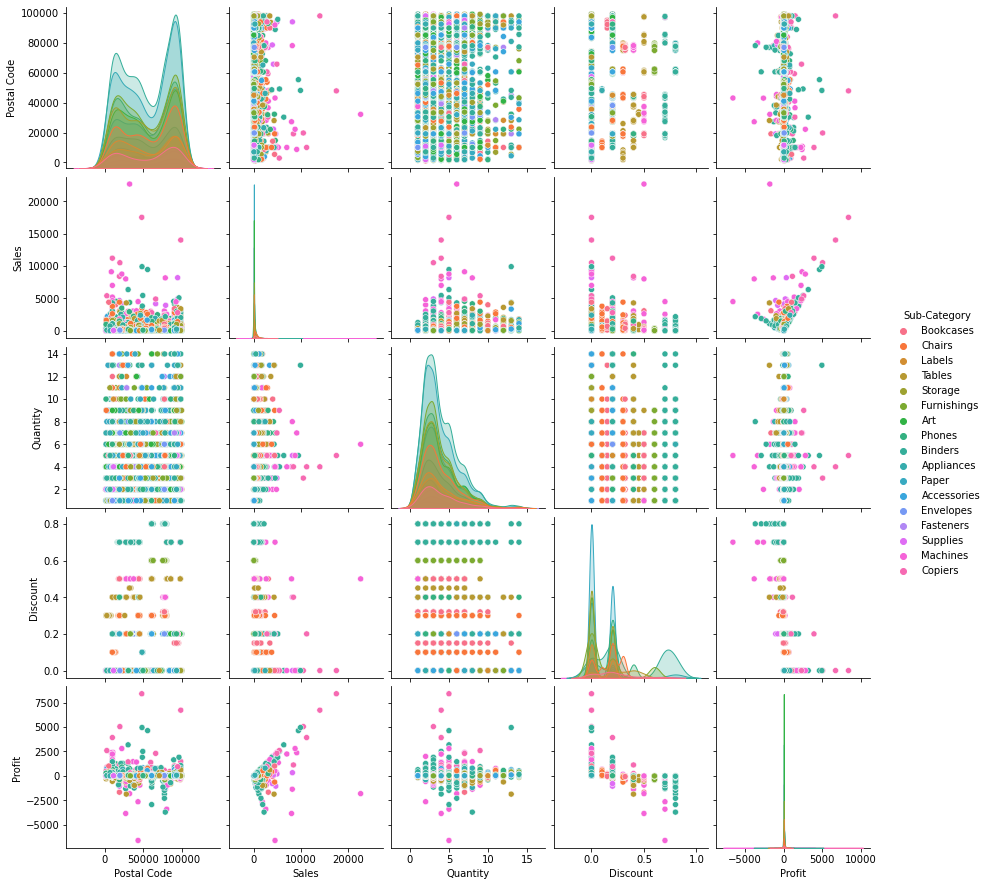

In [25]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')
plt.show()

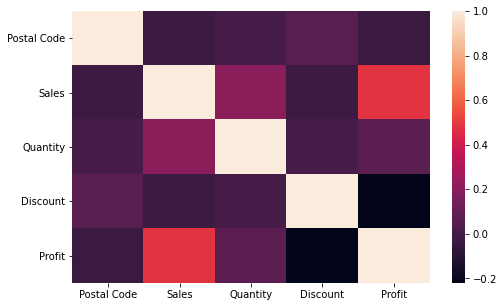

In [24]:
fig, axes = plt.subplots(1,1, figsize = (8,5))
sns.heatmap(data.corr())
plt.show()

##### 
We can see discount and profit are negatively corelated. Values closer to zero means there is no linear trend between the two variables. The values Closer to 1 the correlation is the more positive. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases

1) Here we can see discount and profit are highly negatively corelated

2) Sales and Profits are Moderately Correlated

3) Quantity and Profit are Moderately Correlated

### Handling And Removing Outliers

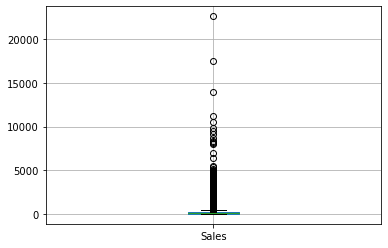

In [14]:
data.boxplot(column=["Sales"])
plt.show()

In [15]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range, upper_range

In [16]:
lowsales,upsales=remove_outlier(data['Sales'])
data['Sales']=np.where(data['Sales']>upsales,upsales,data['Sales'])
data['Sales']=np.where(data['Sales']<lowsales,lowsales,data['Sales'])

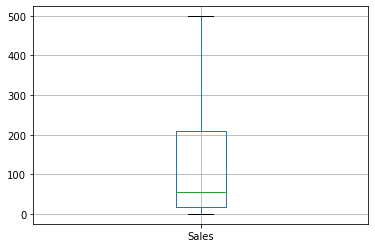

In [17]:
data.boxplot(column=["Sales"])
plt.show()

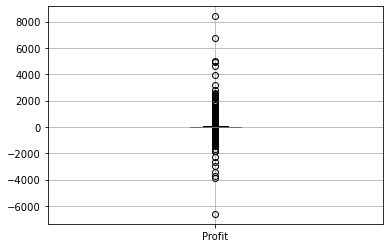

In [18]:
data.boxplot(column=["Profit"])
plt.show()

In [19]:
lowprofit,upprofit=remove_outlier(data['Profit'])
data['Profit']=np.where(data['Profit']>upprofit,upprofit,data['Profit'])
data['Profit']=np.where(data['Profit']<lowprofit,lowprofit,data['Profit'])

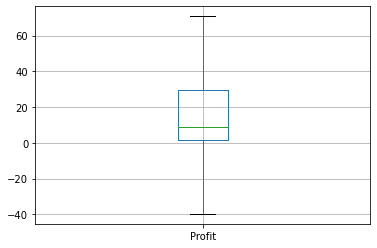

In [20]:
data.boxplot(column=["Profit"])
plt.show()

## Data Visualization

### Profit, Sales And Discount By Category

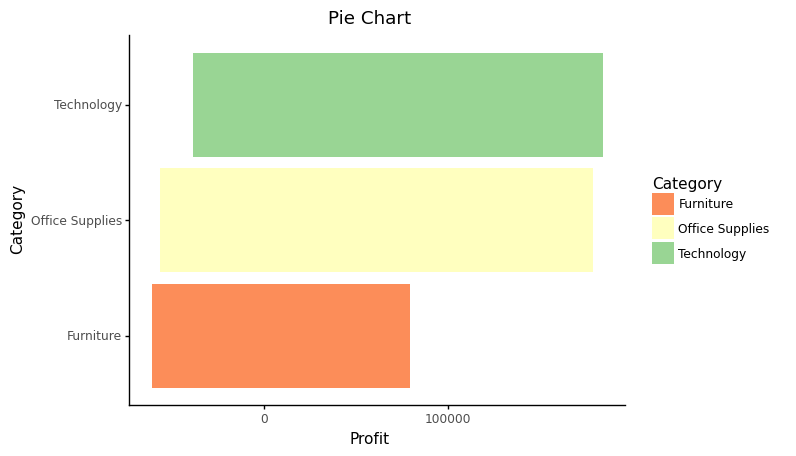

<ggplot: (175655620006)>

In [27]:
Profit_plot = (ggplot(data, aes(x='Category', y='Profit', fill='Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

<Figure size 720x720 with 0 Axes>

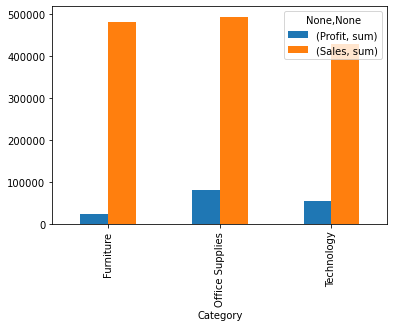

In [21]:
plt.figure(figsize=(10,10))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

Text(0.5, 1.0, 'Segment Wise Analysis')

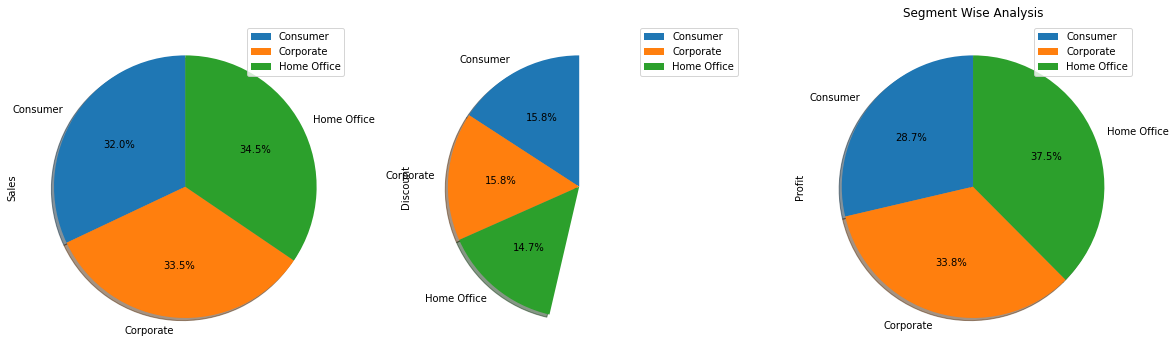

In [39]:
data_segment= data.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
data_segment
data_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20,22),
                    startangle=90,     
                    shadow=True,
                    labels = data_segment.index)
plt.title('Segment Wise Analysis')

### Profit And Sales By Sub-category

<Figure size 720x720 with 0 Axes>

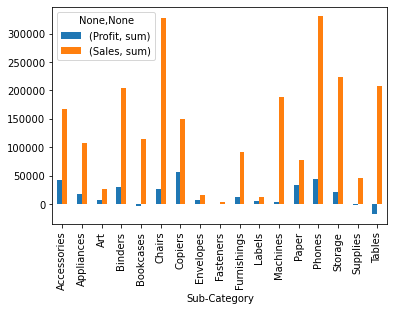

In [32]:
plt.figure(figsize=(10,10))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

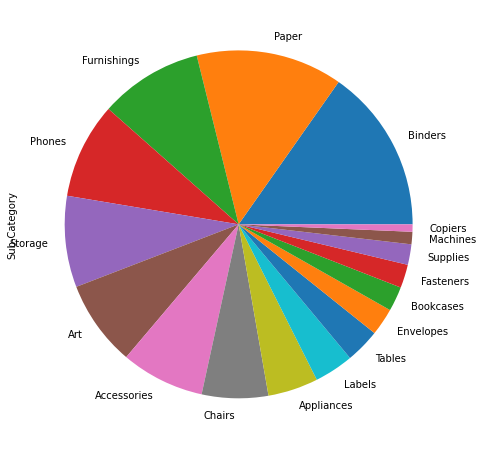

In [37]:
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct='')
plt.show()

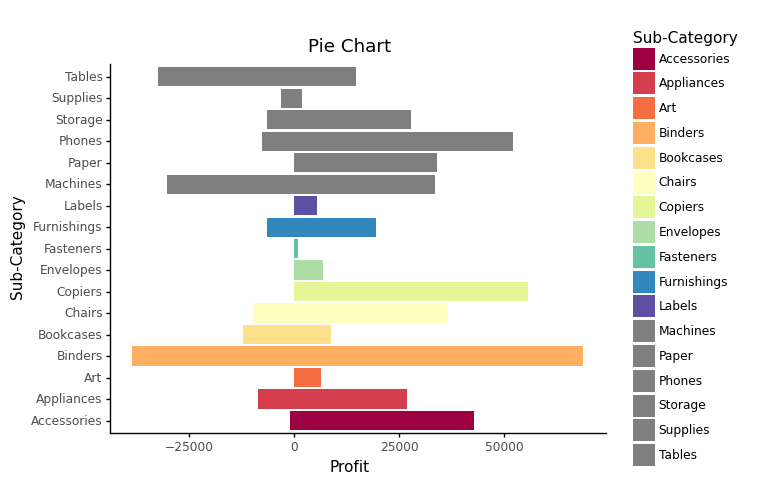

<ggplot: (175655536574)>

In [26]:
Profit_plot = (ggplot(data, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

### Above Pie chart Shows the profit and loss of each and every subcategories.
### Here from graph we can visualize that : 

##### 1) "Binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories 

#####  2) "Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

##### 3) Suffering from highest loss is Tables. 

### Profit And Sales By States

In [23]:
# Count the total repeatable states
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

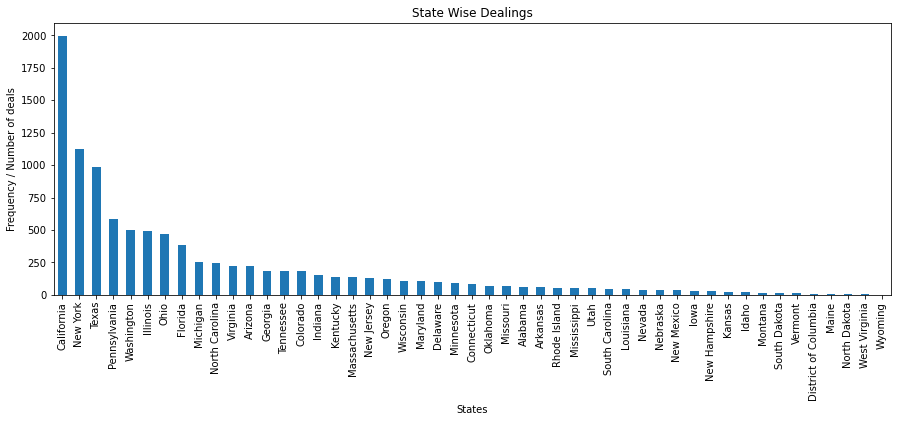

In [40]:
data1 = data['State'].value_counts()
data1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 12)
plt.show()

<AxesSubplot:xlabel='State'>

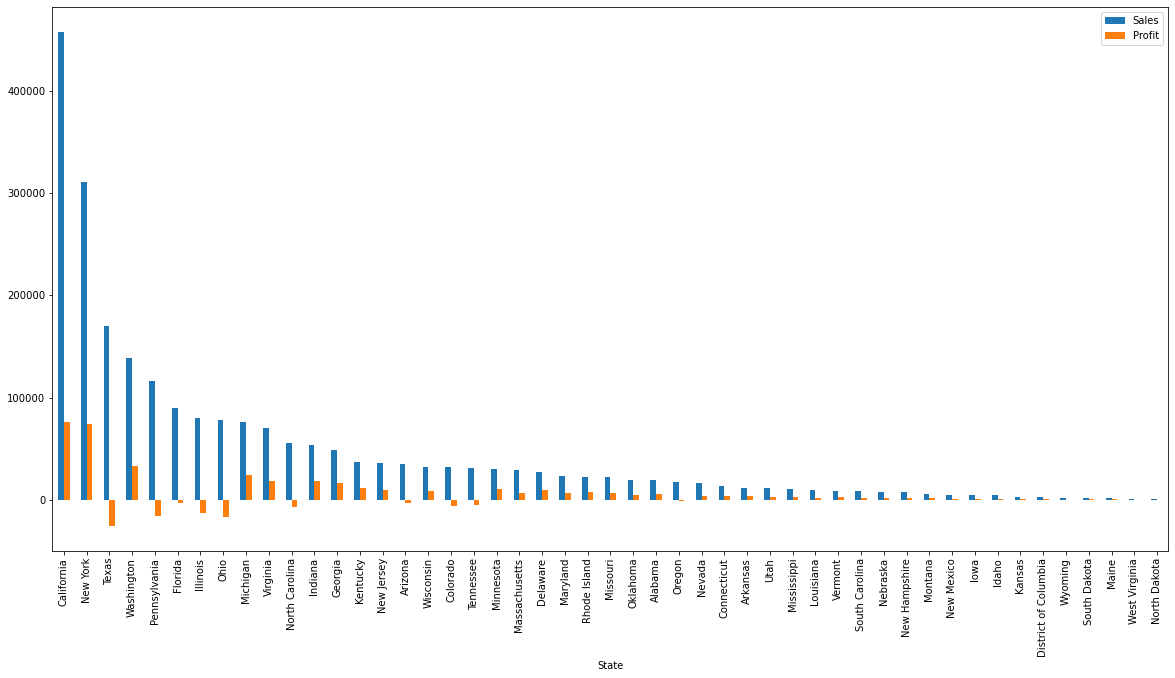

In [47]:
dataplot = data.groupby(['State'])['Sales', 'Profit'].sum().sort_values(by='Sales',ascending=False)
dataplot.plot.bar(figsize = (20,10))

Text(0.5, 1.0, 'State Wise Analysis')

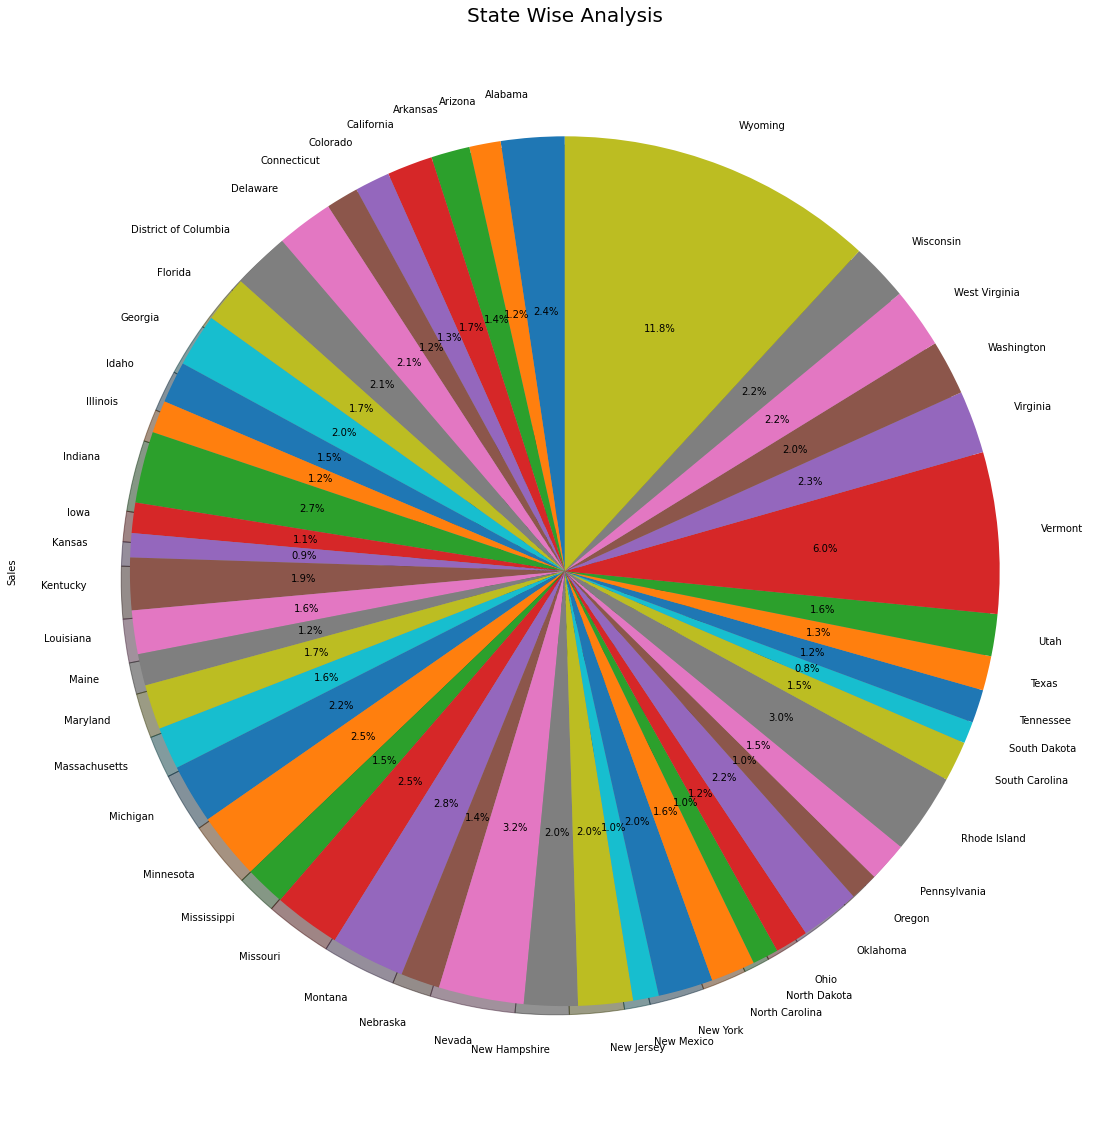

In [53]:
data_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State Wise Analysis',fontsize=20)

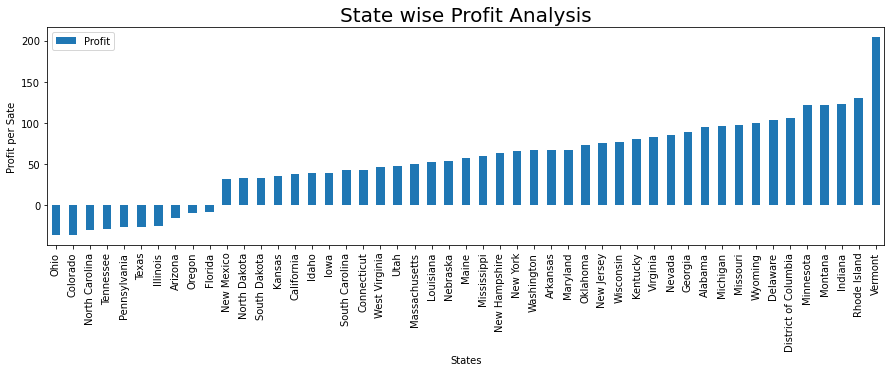

In [51]:
data['State'].value_counts().head(10)
data_state= data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state.head(10)
data_state1=data_state.sort_values('Profit')
data_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

### Above bar graph shows the profit and loss of each and every states.
### Here from graph we can visualize that : 

##### 1) The Highest Profit is obtained from California, followed by New York and Washington

#####  2) Texas suffers the most losses, followed by Ohio and Pennsylvania

##### 3) Vermont offers the highest Profit/Sale followed by Rhode Island and Indiana


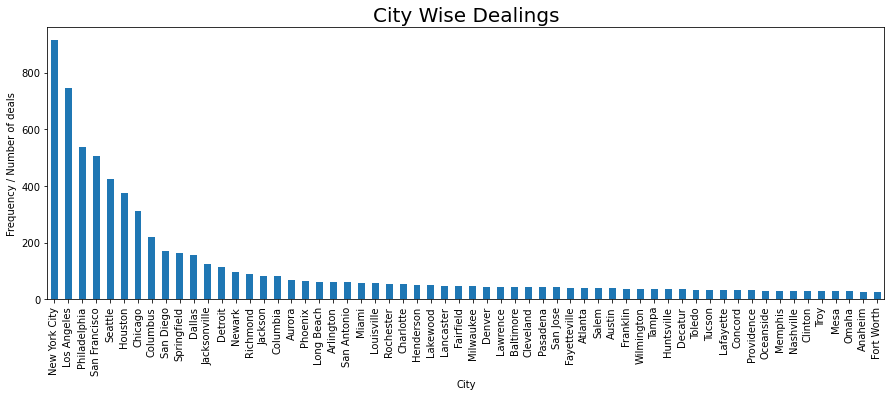

In [44]:
data2 = data['City'].value_counts()
data2=data2.head(60)
data2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 20)
plt.show()

### Profit By Discount

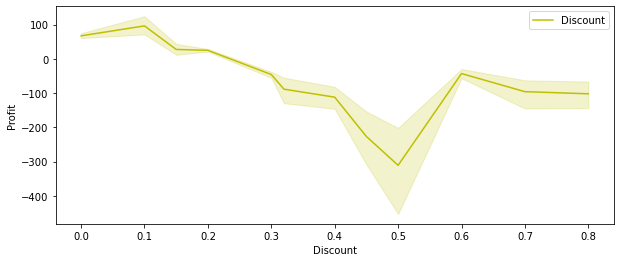

In [55]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data , color='y',label='Discount')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

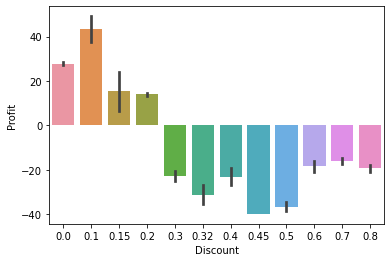

In [26]:
sns.barplot(x=data.Discount,y=data.Profit)

### Profit by Region and Category

<AxesSubplot:xlabel='Region', ylabel='Profit'>

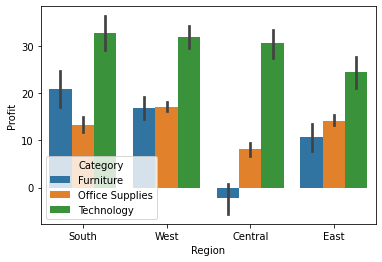

In [27]:
sns.barplot(x=data.Region, y=data.Profit,hue=data.Category)

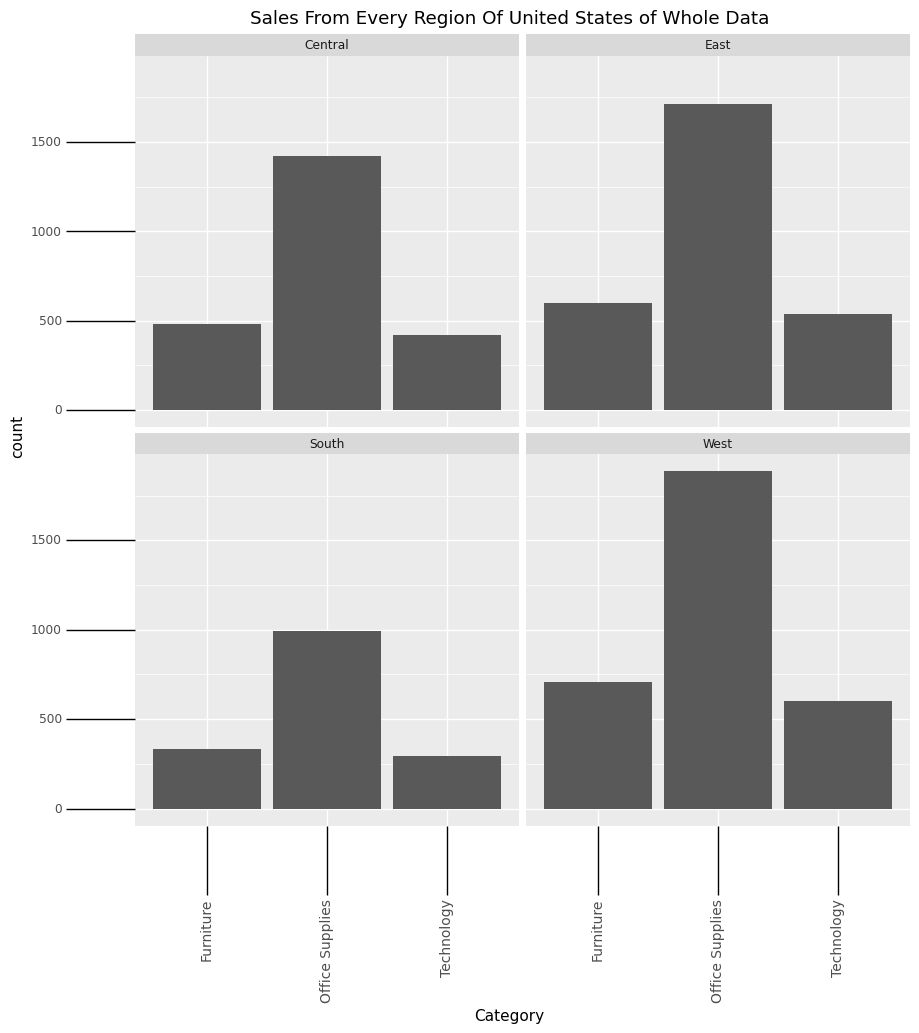

<ggplot: (175657224111)>

In [45]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(data, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

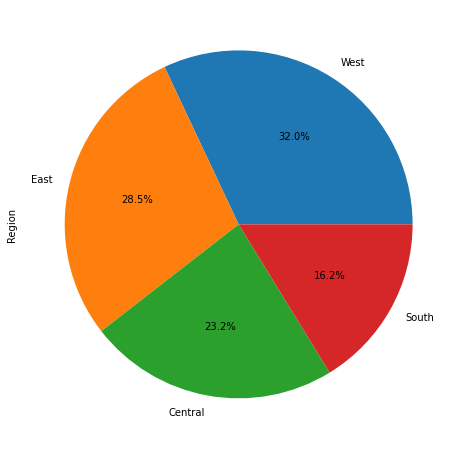

In [36]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### From the above representations we can see that:

#### 1) The West sees the most number of sales among all the four regions, followed by the East

#### 2) The Highest Profit in the respective Category:
#####      a) Office Supplies : West
#####      b) Furniture : South
#####      c) Technology : South

#### 3) The Central region faces a loss in the Furniture Category along with least profit in office supplies


<AxesSubplot:>

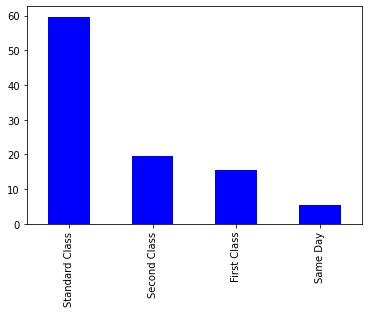

In [54]:
((data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100).plot(kind="bar", color="blue")

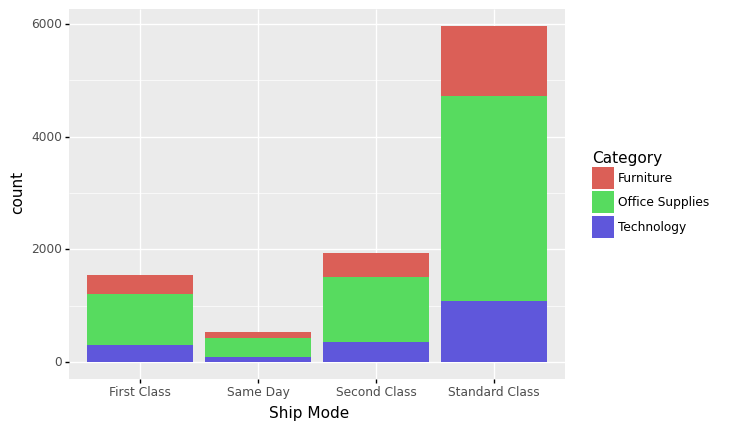

<ggplot: (145729468224)>

In [31]:
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'Second Class'),
  Text(2, 0, 'First Class'),
  Text(3, 0, 'Same Day')])

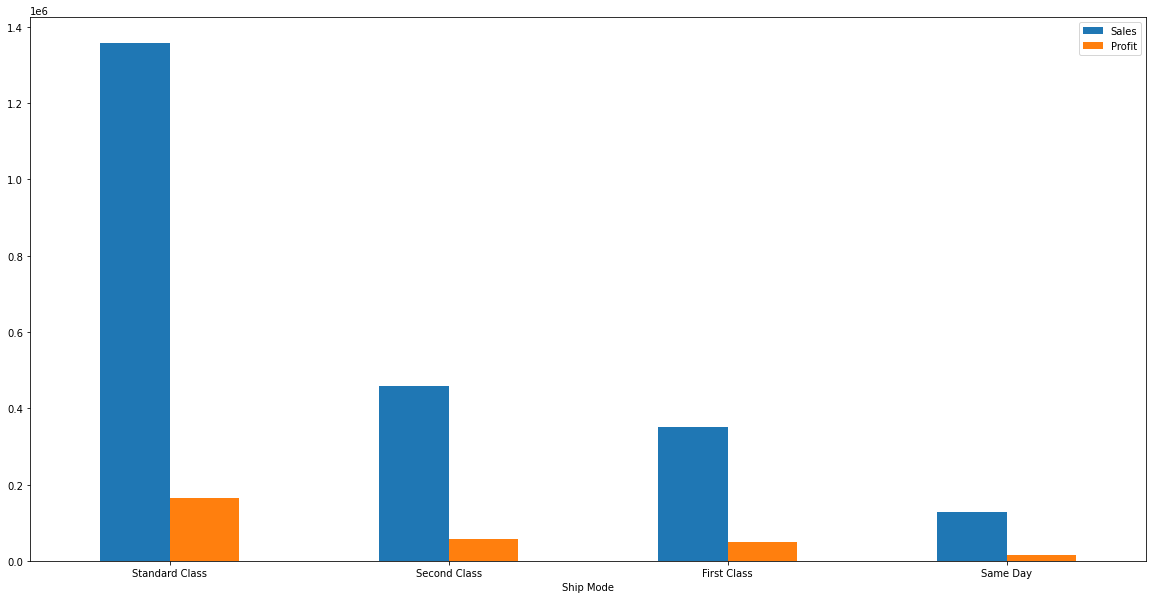

In [60]:
dataplot = data.groupby(['Ship Mode'])['Sales', 'Profit'].sum().sort_values(by='Sales',ascending=False)
dataplot.plot.bar(figsize = (20,10))
plt.xticks(rotation=0)

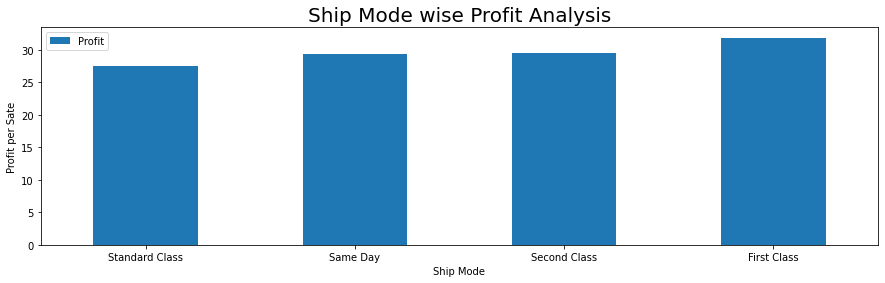

In [62]:
data['Ship Mode'].value_counts().head(10)
data_ship= data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
data_ship.head(10)
data_ship1=data_ship.sort_values('Profit')
data_ship1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('Ship Mode wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('Ship Mode')
plt.xticks(rotation=0)
plt.show()

### According to the ship mode data:

##### 1) Maximum number of shipments belong to the standard class.
##### 2) Very less number of shipments are done on the same day.
##### 3) Maximum Profit is made through shipment in First Class followed by Second Class.